In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import cm

from sklearn import datasets
from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("display.max_rows", None)

# Motivación: visualizar datos multidimensionales

## Clasificación y _clustering_

Datos bidimensionales con _etiquetas_

In [36]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)
#np.unique(y)
df1 = pd.DataFrame(X,columns=['x1','x2'])
df1['label'] = y
df1.head(10)

,x1,x2,label
0,2.631858,0.689365,1
1,0.080804,4.690690,0
2,3.002519,0.742654,1
3,-0.637628,4.091047,0
4,-0.072283,2.883769,0
5,0.628358,4.460136,0
6,-2.674373,2.480062,2
7,-0.577483,3.005434,2
8,2.727562,1.305125,1
9,0.341948,3.941046,0


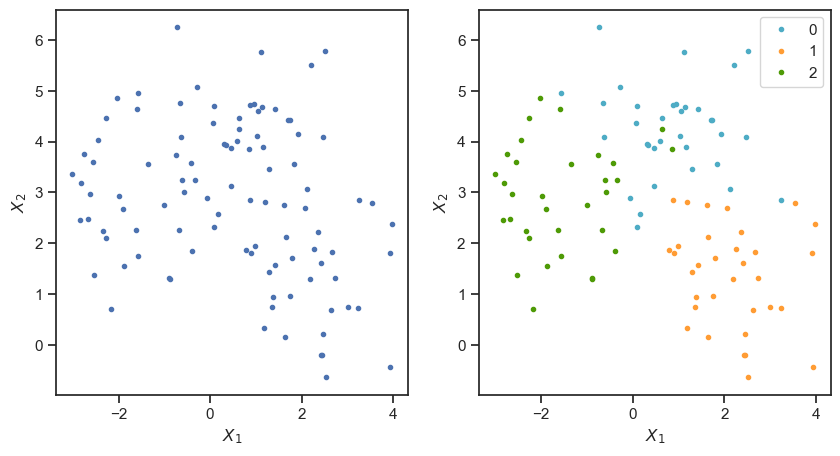

In [37]:
f,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax = axes.ravel()
ax[0].plot(X[:,0],X[:,1],'.')

colors = ["#4EACC5", "#FF9C34", "#4E9A06"]
for yy in np.unique(y):
    dataSelection = y ==yy
    data = X[dataSelection,:]
    ax[1].plot(data[:,0],data[:,1],'.',c=colors[yy],label=yy)
ax[1].legend()
for a in ax:
    a.set_xlabel(r'$X_1$')
    a.set_ylabel(r'$X_2$')
    

Datos tridimensionales con _etiquetas_

In [38]:
X, y = make_blobs(n_samples=200, centers=4, n_features=3,random_state=4)
#np.unique(y)
df1 = pd.DataFrame(X,columns=['x1','x2','x3'])
df1['label'] = y
df1.head()

,x1,x2,x3,label
0,9.863844,0.448826,9.282223,0
1,10.596115,-11.280679,-5.449909,2
2,-2.083092,7.565793,-5.662472,3
3,5.578687,5.149093,-6.176931,1
4,4.101746,3.373981,-6.774126,1


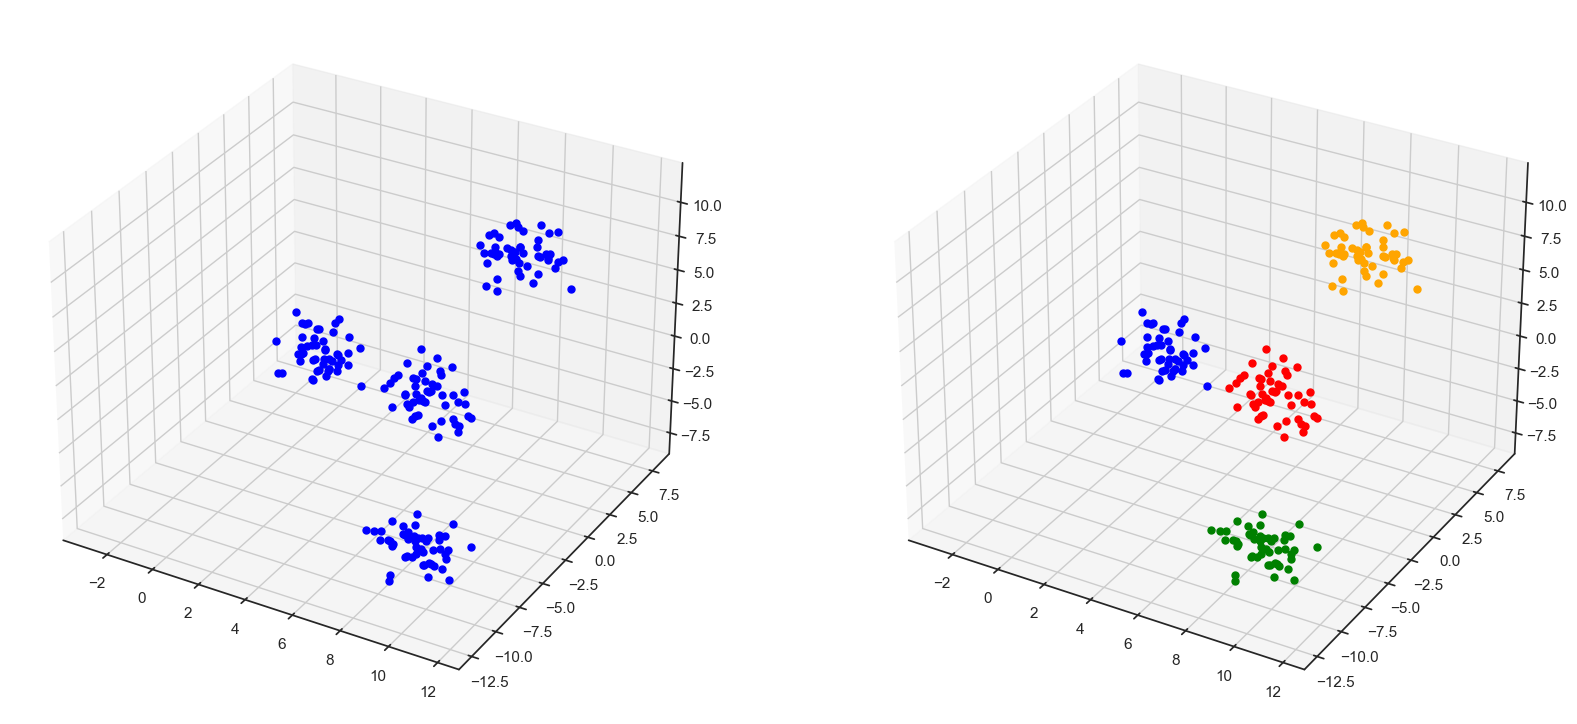

In [39]:
colorsDict = {0:'orange',
              1:'red', 
              2:'green', 
              3:'blue'}

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
for ii in df1.index:
    ax.scatter(
        df1.loc[ii,'x1'],
        df1.loc[ii,'x2'],
        df1.loc[ii,'x3'],
        marker='.',
        s=100,
        color='blue'
        #color = colorsDict[
        #    df1.loc[ii,'label']
        #]
    )
ax = fig.add_subplot(122, projection='3d')
for ii in df1.index:
    ax.scatter(
        df1.loc[ii,'x1'],
        df1.loc[ii,'x2'],
        df1.loc[ii,'x3'],
        marker='.',
        s=100,
        color = colorsDict[
            df1.loc[ii,'label']
        ]
    )
plt.show()

## Regresión

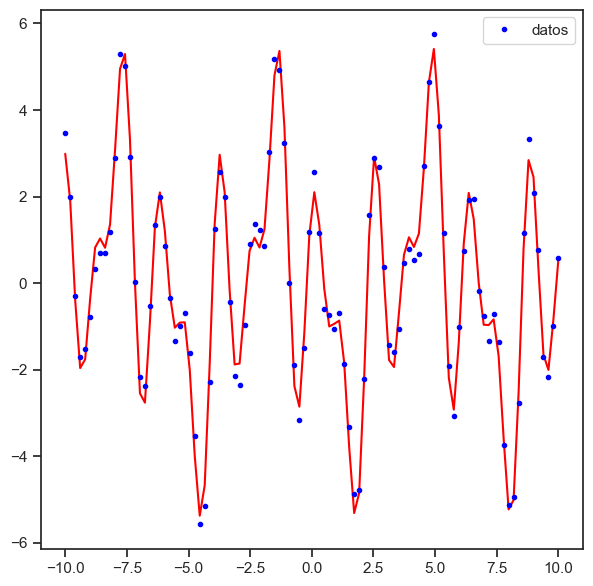

In [40]:
x = np.linspace(-10,10,100)
y = 4*np.sin(x)*np.cos(2*x)+np.sin(3*x)/3+11/6*np.cos(5*x)
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
ax.plot(x,y,'-',color='red')
ydata = y+np.random.uniform(-0.5,0.5,y.shape[0])
ax.plot(x,ydata,'.',color='blue',label='datos')
ax.legend()

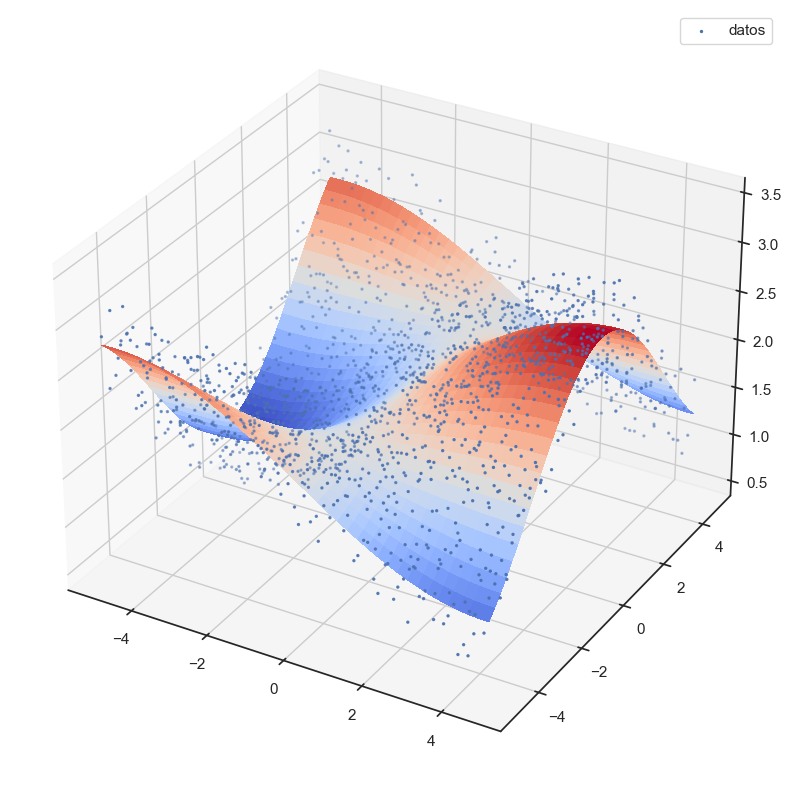

In [41]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z=np.sin(X/3)*np.cos(Y/2)+2
Z2 = np.sin(X/3)*np.cos(Y/2)+2+np.random.uniform(-0.5,0.5,(Z.shape[0],Z.shape[1]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.scatter(X,Y,Z2,s=2,label='datos')
ax.legend()
plt.show()

## Más de tres dimensiones

Cuando tenemos más dimensiones no podemos visualizar los datos.

Datos ``iris``

Usamos la [_scatter_matrix_](https://www.sciencedirect.com/topics/mathematics/scatterplot-matrix)

In [42]:
# iris
iris = datasets.load_iris()
iris_data = iris.data
iris_data.shape
irisDf = pd.DataFrame(iris_data,columns=iris.feature_names)
irisDf['target'] = iris.target
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


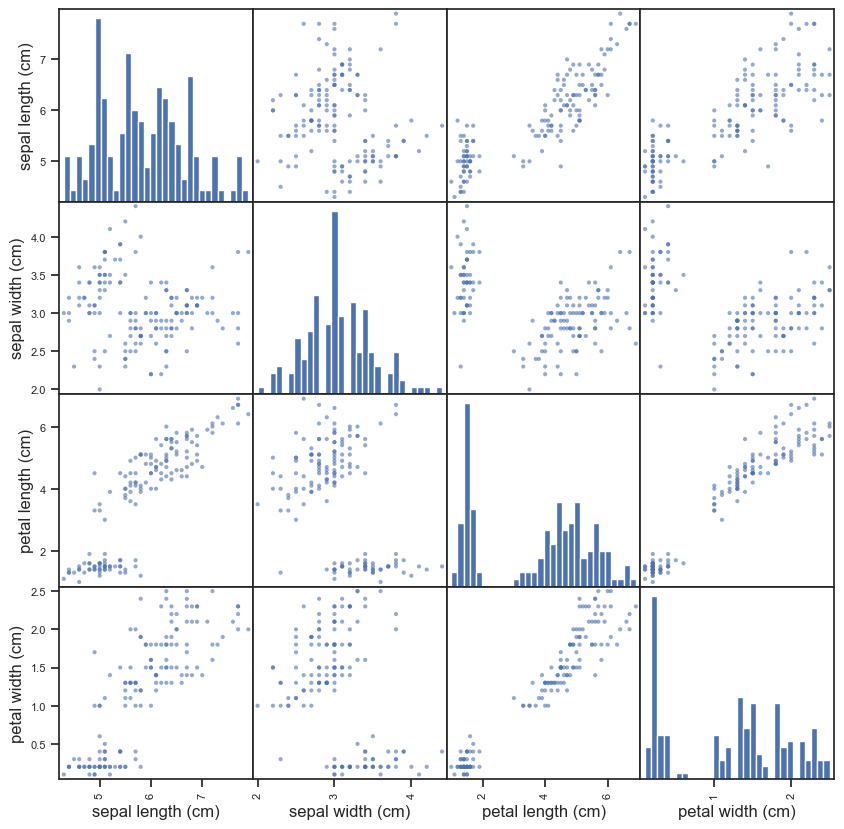

In [43]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
colors=np.array(50*['r']+50*['g']+50*['b'])
pd.plotting.scatter_matrix(df, 
                           alpha=0.6, 
                           figsize=(10,10), 
                           #color=colors,
                           hist_kwds={'bins':30})
plt.show()

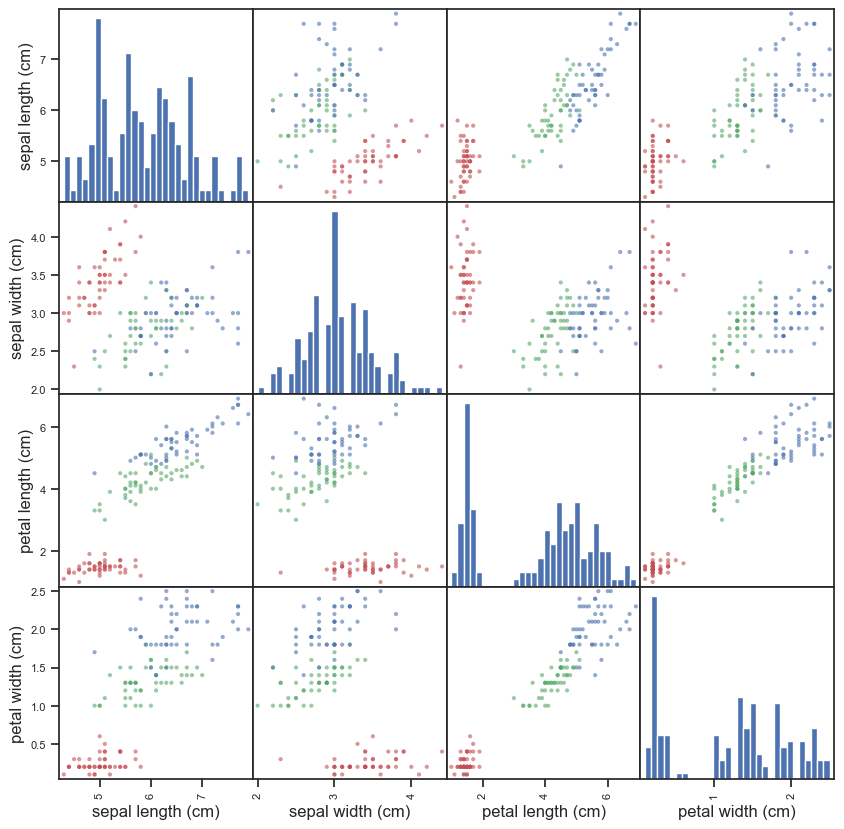

In [44]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
colors=np.array(50*['r']+50*['g']+50*['b'])
pd.plotting.scatter_matrix(df, 
                           alpha=0.6, 
                           figsize=(10,10), 
                           color=colors,
                           hist_kwds={'bins':30})
plt.show()

In [45]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Método ``pairplot`` del paquete ``seaborn``

<a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">https://seaborn.pydata.org/generated/seaborn.pairplot.html</a>

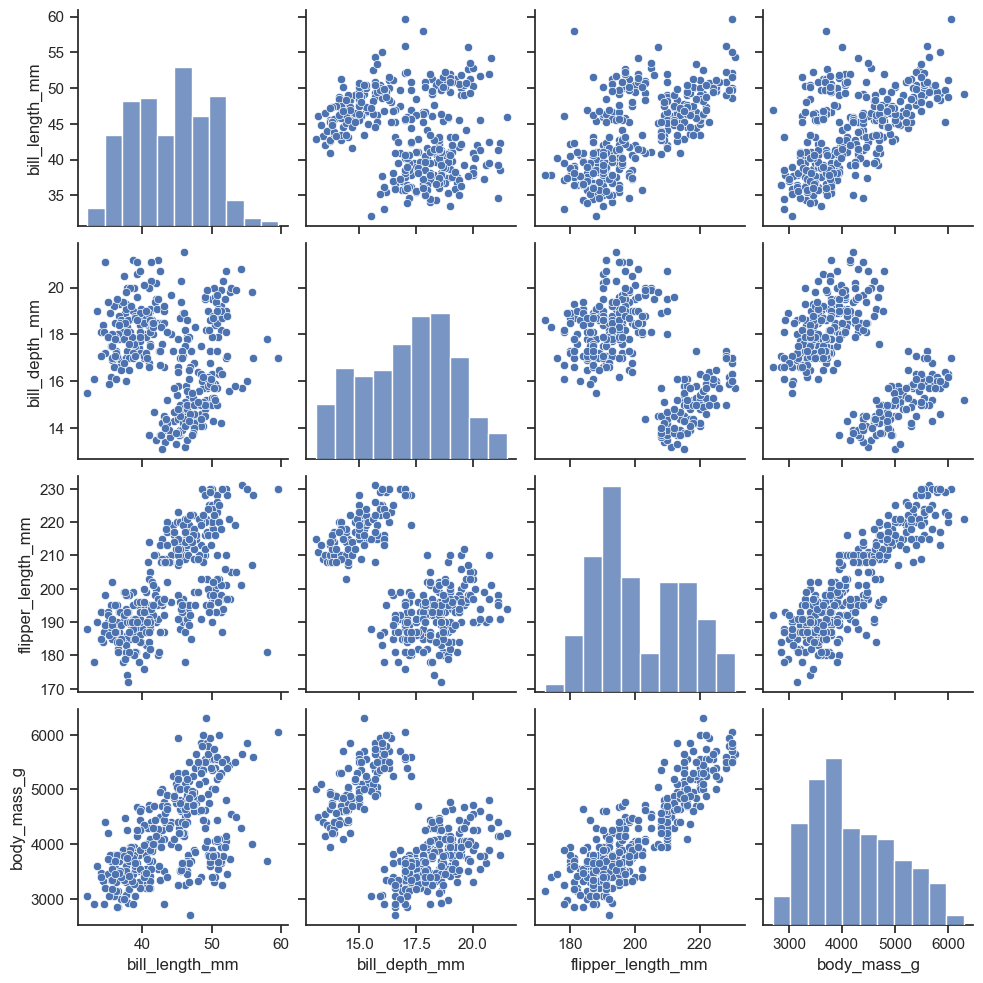

In [46]:
sns.pairplot(df)

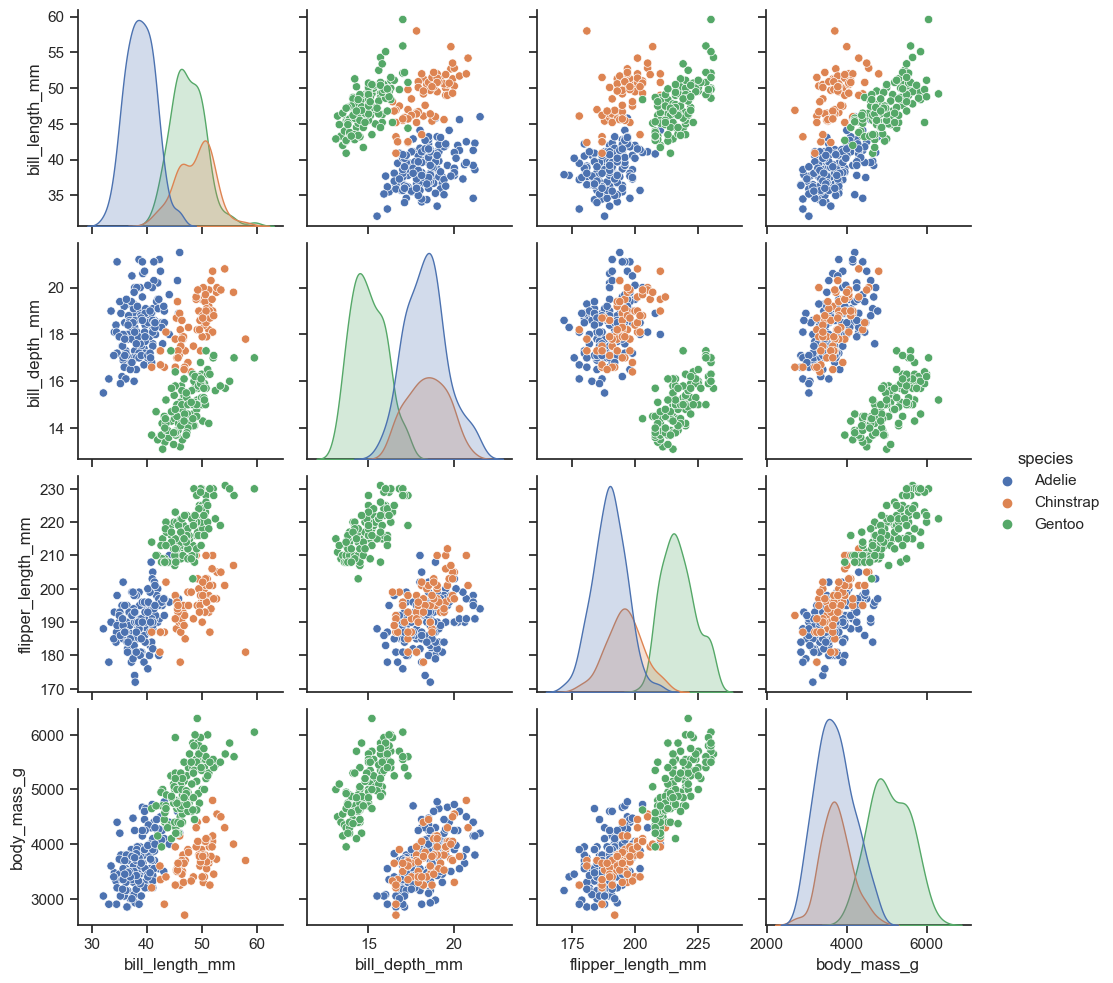

In [47]:
sns.pairplot(df, hue="species")

Puede haber datos __sin__ etiquetas

In [14]:
import numpy as np
import pandas as pd

np.random.seed(134)                     
N = 1000                              
 
x1 = np.random.normal(0, 1, N)                        
x2 = x1 + np.random.normal(0, 3, N)              
x3 = 2 * x1 - x2 +  np.random.normal(0, 2, N)
x4 = x3 * x1 -4*x2 + np.random.normal(0, 1, N)
x5 = x2-x4*x1 + np.random.normal(0, 2, N)

df = pd.DataFrame({'x1':x1,
                   'x2':x2,
                   'x3':x3,
                   'x4':x4,
                   'x5':x5
                  })

df.head()

,x1,x2,x3,x4,x5
0,-0.224315,-8.840152,10.145993,33.286302,-1.376902
1,1.337257,2.383882,-1.854636,-11.590022,18.471552
2,0.882366,3.544989,-1.117054,-14.303068,14.009670
3,0.295153,-3.844863,3.634823,15.538617,-4.391063
4,0.780587,-0.465342,2.121288,2.874332,1.209348


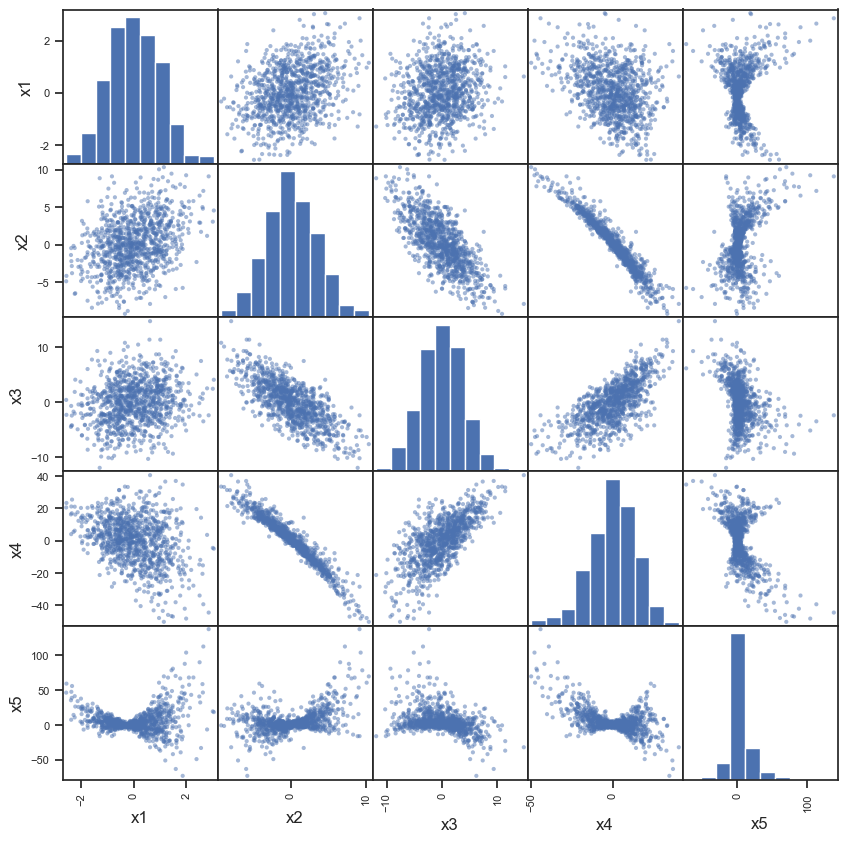

In [15]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()

### Proyecciones

Las gráficas anteriores son proyecciones ortogonales de los datos sobre los diferentes planos formados eligiendo coordenadas de los diferentes atributos, por parejas

Ejemplo _ad hoc_ en tres dimensiones

In [16]:

clusters=[1,2,3,4,5,6]
Npuntos = 40*len(clusters)

dictClusters={1:(1,0,0),
              2:(0,1,0),
              3:(0,0,1),
             4:(-1,0,0),
             5:(0,-1,0),
             6:(0,0,-1)}

dictDesvests={1:0.15,
              2:0.15,
              3:0.15,
             4:0.15,
             5:0.15,
             6:0.15}


label = []
df = pd.DataFrame(columns = ['x1','x2','x3'])
for _ in range(Npuntos):
    cluN = np.random.choice(clusters)
    clu=dictClusters[cluN]
    clx,cly,clz = clu
    desvest = dictDesvests[cluN]
    clx += np.random.normal(0,desvest)
    cly += np.random.normal(0,desvest)
    clz += np.random.normal(0,desvest)
    label.append(cluN)
    df.loc[df.shape[0]] = [clx,cly,clz]
df['label'] = label

In [17]:
df.head()

,x1,x2,x3,label
0,-1.017333,0.098265,0.038147,4
1,-1.266728,-0.147091,0.011565,4
2,-1.010595,-0.059136,-0.128969,4
3,0.018001,-1.076903,0.076536,5
4,-0.088302,-0.908741,-0.319811,5


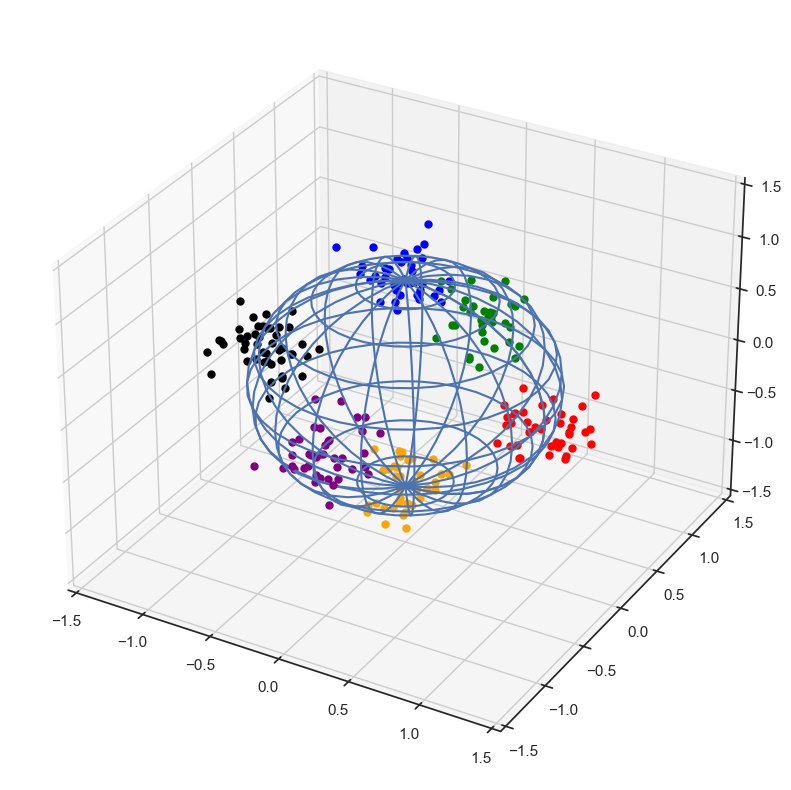

In [18]:
colorsDict = {6:'orange',
              1:'red', 
              2:'green', 
              3:'blue',
             4:'black',
             5:'purple'}

#maxLabel = np.max(df.label.unique())

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


u = np.linspace(0, 2 * np.pi, 39)
v = np.linspace(0,np.pi, 21)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

## Use 3x the stride, no scipy zoom
#ax = fig.gca(projection='3d')
##ax.plot_surface(x, y, z, rstride=3, cstride=3, color='black', shade=0)
#ax.plot_wireframe(x, y, z,rstride=2,cstride=2)

#plt.show()

# Normalize to [0,1]
norm = plt.Normalize(z.min(), z.max())
colors = cm.viridis(norm(z))
rcount, ccount, _ = colors.shape

#fig = plt.figure()
ax.plot_wireframe(x, y, z,rstride=2,cstride=2)

#surf = ax.plot_surface(x, y, z, rcount=rcount, ccount=ccount,
#                       facecolors=colors, shade=False)



for ii in df.index:
    ax.scatter(
        df.loc[ii,'x1'],
        df.loc[ii,'x2'],
        df.loc[ii,'x3'],
        marker='.',
        s=100,
        color=colorsDict[df.loc[ii,'label']]
    )

ax.set_xlim((-1.5,1.5))
ax.set_ylim((-1.5,1.5))
ax.set_zlim((-1.5,1.5))

plt.show()

C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

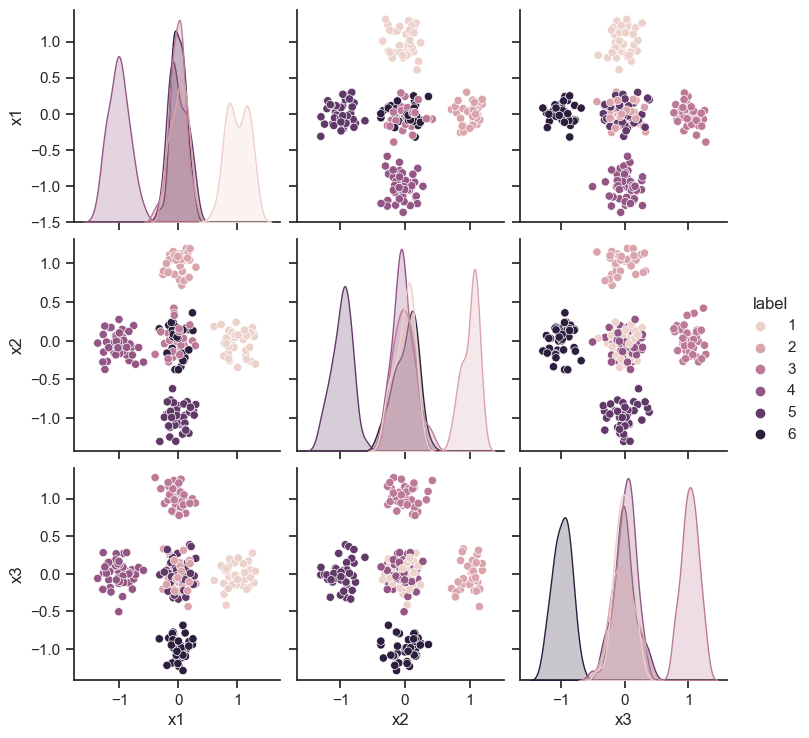

In [19]:
sns.pairplot(df, hue="label")

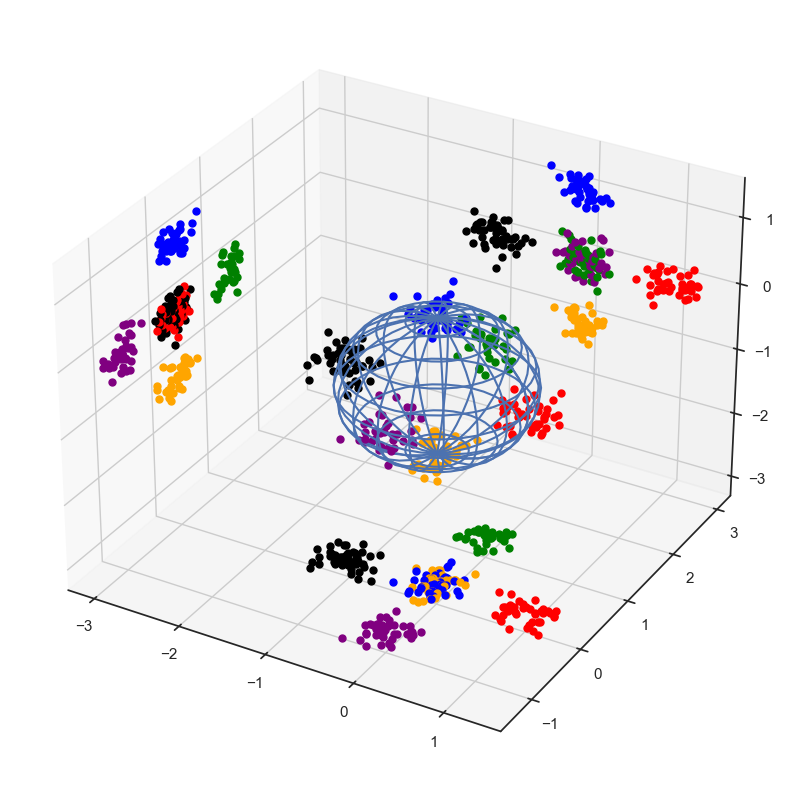

In [20]:
colorsDict = {6:'orange',
              1:'red', 
              2:'green', 
              3:'blue',
             4:'black',
             5:'purple'}

#maxLabel = np.max(df.label.unique())

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


u = np.linspace(0, 2 * np.pi, 39)
v = np.linspace(0,np.pi, 21)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

## Use 3x the stride, no scipy zoom
#ax = fig.gca(projection='3d')
##ax.plot_surface(x, y, z, rstride=3, cstride=3, color='black', shade=0)
#ax.plot_wireframe(x, y, z,rstride=2,cstride=2)

#plt.show()

# Normalize to [0,1]
norm = plt.Normalize(z.min(), z.max())
colors = cm.viridis(norm(z))
rcount, ccount, _ = colors.shape

#fig = plt.figure()
ax.plot_wireframe(x, y, z,rstride=2,cstride=2)

#surf = ax.plot_surface(x, y, z, rcount=rcount, ccount=ccount,
#                       facecolors=colors, shade=False)



for ii in df.index:
    ax.scatter(
        df.loc[ii,'x1'],
        df.loc[ii,'x2'],
        df.loc[ii,'x3'],
        marker='.',
        s=100,
        color=colorsDict[df.loc[ii,'label']]
    )
    
# proyeccion 1
for ii in df.index:
    ax.scatter(
        -3,
        df.loc[ii,'x2'],
        df.loc[ii,'x3'],
        marker='.',
        s=100,
        color=colorsDict[df.loc[ii,'label']]
    )

# proyeccion 2
for ii in df.index:
    ax.scatter(
        df.loc[ii,'x1'],
        3,
        df.loc[ii,'x3'],
        marker='.',
        s=100,
        color=colorsDict[df.loc[ii,'label']]
    )

# proyeccion 2
for ii in df.index:
    ax.scatter(
        df.loc[ii,'x1'],
        df.loc[ii,'x2'],
        -3,
        marker='.',
        s=100,
        color=colorsDict[df.loc[ii,'label']]
    )

plt.show()

> Ninguna proyección es completamente satisfactoria: problema con la distancia.

__Nota:__ estas no son las únicas proyecciones posibles.Existen más proyecciones posibles

* Recordatorio: [proyección ortogonal en una recta](https://en.wikipedia.org/wiki/Vector_projection)

Ejemplo _ad hoc_ en el plano

In [21]:
c1 = np.array((1,1))
c2 = np.array((2,1))
c3 = np.array((1,2))
c4 = np.array((2,2))
centers = [c1,c2,c3,c4]
Npuntos = 20
df = pd.DataFrame(columns=['x1','x2'])
labels=[]
for lb,c in enumerate(centers):
    for _ in range(Npuntos):
        df.loc[df.shape[0]] = c+np.random.uniform(-0.25,0.25,2)
        labels.append(lb)
df['label'] = labels
df.head()

,x1,x2,label
0,1.056981,0.935569,0
1,0.781720,0.935267,0
2,0.810779,0.867002,0
3,0.906029,1.030259,0
4,1.103518,1.027526,0


C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\valer_z\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

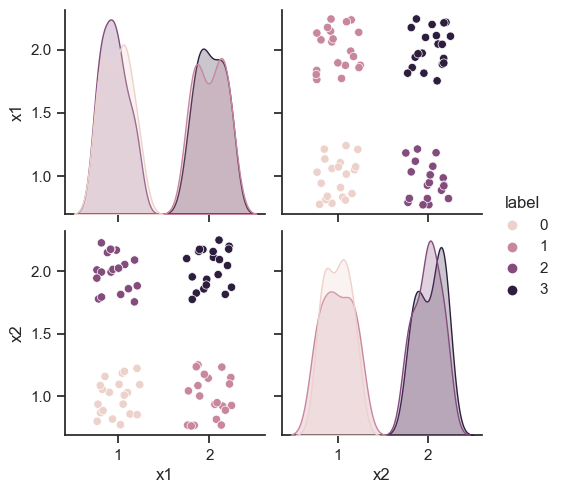

In [22]:
sns.pairplot(df, hue="label")

In [23]:
# proyecciones
p1  = []
vR1 = np.array((1,1))
iR1 = np.inner(vR1,vR1)

p2 = []
vR2 = np.array((1,-1))
iR2 = np.inner(vR2,vR2)

for ii in df.index:
    v = np.array((df.loc[ii,'x1'],df.loc[ii,'x2']))
    p1.append(np.inner(v,vR1)/iR1)
    p2.append(np.inner(v,vR2)/iR2)

df['p1']  = p1
df['p2']  = p2
df.head()

,x1,x2,label,p1,p2
0,1.056981,0.935569,0,0.996275,0.060706
1,0.781720,0.935267,0,0.858494,-0.076773
2,0.810779,0.867002,0,0.838890,-0.028112
3,0.906029,1.030259,0,0.968144,-0.062115
4,1.103518,1.027526,0,1.065522,0.037996


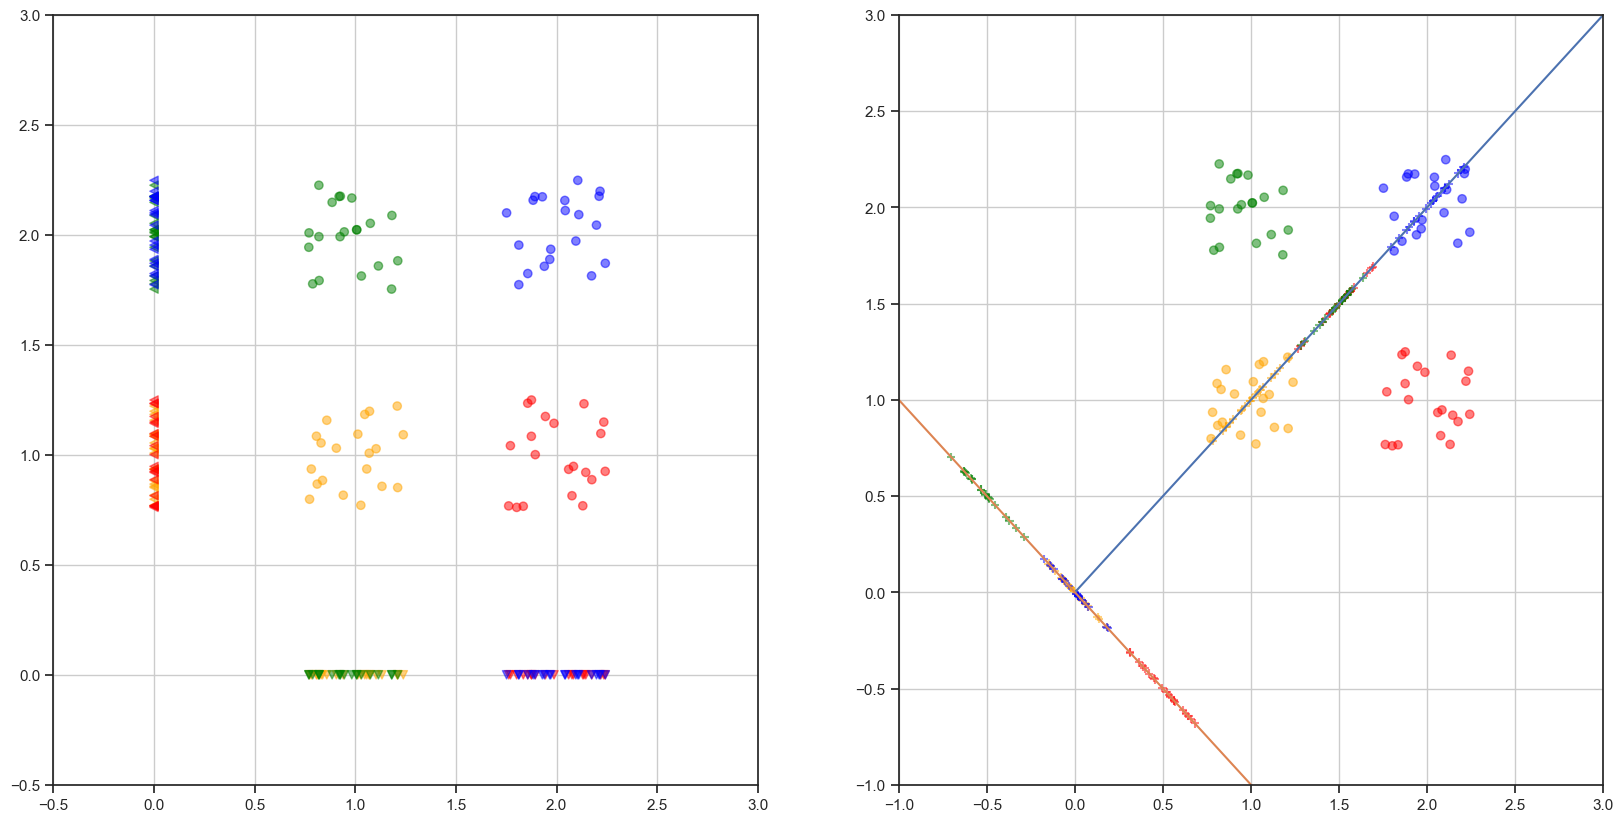

In [24]:
colorsDict = {0:'orange',
              1:'red', 
              2:'green', 
              3:'blue'}
colores = [colorsDict[df.label.loc[i]] for i in df.index]
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].scatter(df.x1,df.x2,c=colores,alpha=0.5)
ax[0].scatter(np.zeros(df.shape[0]),df.x2,marker='<',c=colores,alpha=0.5)
ax[0].scatter(df.x1,np.zeros(df.shape[0]),marker='v',c=colores,alpha=0.5)
ax[0].set_xlim((-0.5,3))
ax[0].set_ylim((-0.5,3))
ax[0].grid()

ax[1].scatter(df.x1,df.x2,c=colores,alpha=0.5)
ax[1].plot(np.linspace(-0,3,100),np.linspace(-0,3,100))
ax[1].plot(np.linspace(-3,3,100),-np.linspace(-3,3,100))
ax[1].scatter(df.p1,df.p1,marker = '+',c=colores,alpha=0.5)
ax[1].scatter(df.p2,-df.p2,marker = '+',c=colores,alpha=0.5)
ax[1].set_xlim((-1,3))
ax[1].set_ylim((-1,3))
ax[1].grid()


__Nota:__ existen direcciones para las cuales las proyecciones son más _adecuadas_ 

* [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
* [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

## Mapa

:::{figure-md} markdown-fig.6.00.1
<img src="./images/som_mapaMadrid.png" alt="fishy" class="bg-primary mb-1" width="600px">

Mapa de Madrid
:::

Un mapa es una [__proyección cartográfica__](https://es.wikipedia.org/wiki/Proyecci%C3%B3n_cartogr%C3%A1fica) en la que puntos geográficos cercanos están cerca en el mapa.